# DATASET FEATURES

In [2]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
df = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Data Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#Checking the presence of null values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# UNSUPERVISED LEARNING 

In [7]:
#Import the relevant libraries and modules.
from sklearn.preprocessing import StandardScaler                    
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from adjustText import adjust_text
from yellowbrick.cluster import KElbowVisualizer


# PERFORM PCA 

- We first perform Principal component analysis (PCA) as it is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data.
- By doing PCA first before clustering in this unsupervised learning project all the important information is retained. 


In [8]:
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
pca = PCA()
pca_df = pca.fit_transform(std_df)

In [17]:
#Explained Variance Ratio

pca.explained_variance_ratio_



array([0.26138907, 0.19714578])

In [10]:
# To check the exact and cumulative explsined variance per component to decide on the optimal component number for our analysis
# The one to expain the calculations is : explained_variance_ratio_() function

explained_variance = pd.DataFrame([pca.explained_variance_ratio_,
                                   pca.explained_variance_ratio_.cumsum()]).T

explained_variance.columns = ['Exp Var', 'Cum Exp Var']
explained_variance 

,Exp Var,Cum Exp Var
0,0.261389,0.261389
1,0.197146,0.458535
2,0.124469,0.583004
3,0.097995,0.680999
4,0.093847,0.774846
5,0.081652,0.856498
6,0.054269,0.910768
7,0.046465,0.957232
8,0.042768,1.000000


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(std_df)


# WORKING WITH KMeans CLUSTERING 


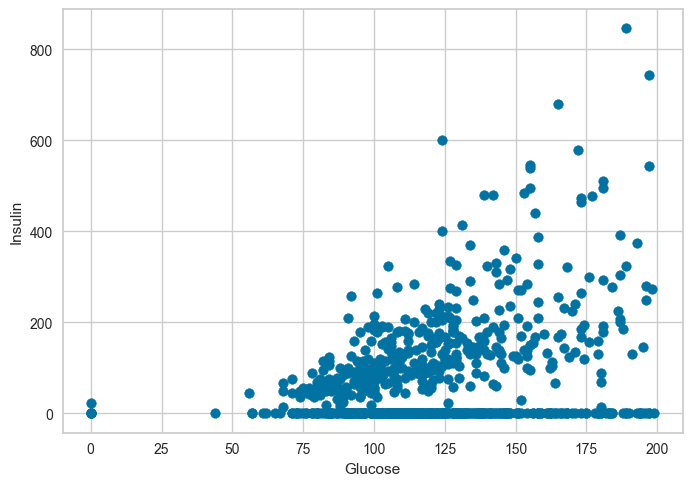

In [12]:
#data1 visualization
plt.scatter(df['Glucose'], df['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()


- ELBOW METHOD

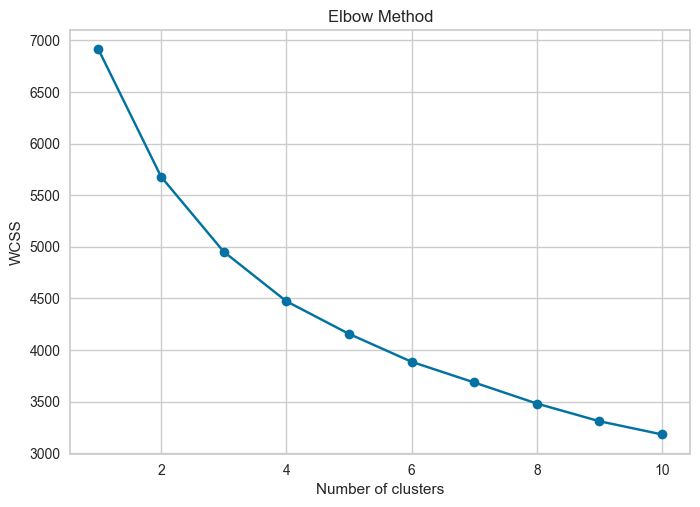

In [13]:
# Calculate the within cluster sum of squares for each cluster number to help us determine the ideal cluster number.
# To evaluate the results, we will use the ELBOW method. For other statistics and selection methods

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, '-o')                                    # Plot Elbow graph
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




In [14]:
# Init Model
km_model = KMeans(n_clusters=4)

#Fit predict
y_pred = km_model.fit_predict(pca_df)
y_pred

array([1, 0, 1, 0, 2, 0, 3, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 3, 3, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 3, 1, 1, 3, 2, 3, 1, 1, 2,
       1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 3, 0, 1, 0, 3, 1, 0,
       3, 1, 0, 3, 3, 3, 1, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 3, 1, 3,
       1, 0, 0, 3, 3, 1, 3, 3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       2, 2, 3, 0, 2, 1, 1, 0, 0, 0, 2, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 1,
       2, 1, 0, 3, 3, 3, 0, 3, 1, 3, 3, 1, 3, 0, 0, 3, 1, 0, 3, 0, 2, 2,
       1, 2, 0, 3, 0, 1, 3, 1, 3, 0, 1, 1, 3, 0, 0, 3, 1, 2, 0, 3, 0, 2,
       0, 2, 1, 1, 0, 3, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 3,
       2, 2, 3, 3, 3, 0, 1, 0, 2, 1, 3, 1, 0, 3, 1, 2, 1, 2, 3, 3, 3, 1,
       2, 1, 0, 1, 0, 3, 0, 2, 2, 3, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 3,
       0, 2, 3, 1, 1, 2, 2, 0, 1, 0, 0, 3, 1, 3, 3, 0, 3, 2, 3, 0, 3, 1,
       1, 3, 3, 3, 0, 0, 2, 0, 0, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1,
       2, 2, 0, 3, 3, 3, 2, 2, 1, 3, 2, 3, 1, 1, 3,

In [15]:
km_model.cluster_centers_

array([[ 1.71240599, -0.04795266],
       [-0.63643947, -1.65681438],
       [-2.21930986,  0.83496624],
       [ 0.25775647,  0.98467741]])

- SILHOUETTE METHOD

In [16]:
# Check the silhouette score 
# Instantiate the KMeans model

sil_df = KMeans(random_state=0)

#Visualise the number of clusters with KElbowVisualizer
visualizer = KElbowVisualizer(sil_df, k=(2,10), metric='silhouette', timings=False)

#Fit the data and visualize
